In [214]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [215]:
import numpy as np
import plot1qbit
#from kyle_helper.data.utility import rsync
import os
import h5py
import sys
sys.stdout.flush()
plt.rcParams['savefig.facecolor'] = '#ffffff'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman, Times, Times New Roman'
matplotlib.rcParams['axes.unicode_minus'] = False

#plt.rcParams['figure.dpi'] = 72
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
REDCOLOR = "#CF5C5E"
GREENCOLOR="#83c763"
plt.rcParams['axes.facecolor']='#F4F5F6'
plt.rcParams['grid.color'] = "#CCCCCC"
plt.rcParams['grid.alpha'] = 1.0
plt.rcParams['grid.linewidth'] = 0.5

def Hamiltonian(arr):
    #A = np.copy(AA)
    if len(arr.shape)==1:
        A = np.reshape(arr,(int(np.sqrt(arr.shape[0])),int(np.sqrt(arr.shape[0]))))
    else:
        A=arr
        
    return -np.sum(np.multiply(np.roll(A,-1,axis=0),A)+np.multiply(np.roll(A,-1,axis=1),A))

def Hamiltonian_v(arr):
    if len(arr.shape)==2:        
        A = np.reshape(arr,(arr.shape[0], int(np.sqrt(arr.shape[1])),int(np.sqrt(arr.shape[1]))))
    else:
        A=arr
    return -np.sum(np.multiply(np.roll(A,-1,axis=1),A)+np.multiply(np.roll(A,-1,axis=2),A), axis=(1,2))


import subprocess
def git_save(plot, push=True):
    subprocess.Popen(['git','add',"Plots.ipynb"])
    subprocess.Popen(['git','commit', '-m', "Plots.ipynb"])
    subprocess.Popen(['git','add',plot])
    subprocess.Popen(['git','commit','-m',plot])
    if push:
        subprocess.Popen(['git','push'])
        
        


In [29]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

def axis_to_fig(axis):
    fig = axis.figure
    def transform(coord):
        return fig.transFigure.inverted().transform(
            axis.transAxes.transform(coord))
    return transform

def add_sub_axes(axis, rect):
    fig = axis.figure
    left, bottom, width, height = rect
    trans = axis_to_fig(axis)
    figleft, figbottom = trans((left, bottom))
    figwidth, figheight = trans([width,height]) - trans([0,0])
    return fig.add_axes([figleft, figbottom, figwidth, figheight])

def stroked_line(ax,xy1,xy2,color,linewidth,zorder,connectionstyle='arc3,rad=0.0'):
    ax.annotate("",xy=xy1, xytext=xy2, xycoords='data', textcoords='data', 
                arrowprops=dict(arrowstyle='-', connectionstyle=connectionstyle, color='white', linewidth=linewidth+2, zorder=zorder), 
                zorder=zorder)
    ax.annotate("",xy=xy1, xytext=xy2, xycoords='data', textcoords='data', 
                arrowprops=dict(arrowstyle='-', connectionstyle=connectionstyle, color=color, linewidth=linewidth, zorder=zorder+1), 
                zorder=zorder)    

def make_wsc_graph(ax, r=[0,0], cluster_2_offset=-0.5, linewidth=1.0):
    co = cluster_2_offset
    nodes = []
    colors=[]
    for cluster in [0,1]:
        for x in [0+cluster*(3+co),1+cluster*(3+co)]:
            for y in range(4):
                nodes.append(Circle(xy=(x+r[0],y+r[1]), radius=0.24))
                colors.append("#3ECDEF" if cluster==0 else "#C2CBCF")
            
    PC = PatchCollection(nodes, zorder=100, edgecolor='k', facecolor=colors)
    ax.add_collection(PC)    
    

    zorder=10
    for y1 in range(4):
        for y2 in range(4):
                
            stroked_line(xy1=(0,y1), xy2=(1,y2), color="#3ECDEF", linewidth=linewidth, zorder=zorder,ax=ax)
            zorder += 2
            stroked_line(xy1=(3+co,y1), xy2=(4+co,y2), color="#3ECDEF", linewidth=linewidth, zorder=zorder,ax=ax)
            #ax.annotate("",xy=(3+co,y1), xytext=(4+co,y2), xycoords='data', textcoords='data', arrowprops=dict(arrowstyle='-', color=color, linewidth=weight, zorder=zorder), zorder=zorder)
            zorder += 2
        
        stroked_line(xy1=(1,y1), xy2=(3+co,y1), connectionstyle="arc3,rad=0.3", color="#3ECDEF", linewidth=linewidth, zorder=zorder,ax=ax)
    
    ax.set_xlim([-1,4])
    ax.set_ylim([-0.5,3.5])
    ax.set_aspect('equal')
    ax.axis('off')
    
def make_sg_graph(ax,linewidth=1):
    couplings = [
        [0 ,   12 ],    [0 ,   3 ],    [1 ,   13 ],    [1 ,   0 ],    [2 ,   14 ],    [2 ,   1 ],    [3 ,   15 ],    [3 ,   2 ],    [4 ,   0 ],    [4 ,   7 ],    [5 ,   1],    [5 ,   4 ],    [6 ,   2],    [6 ,   5 ],    [7 ,   3 ],    [7 ,   6 ],    [8 ,   4 ],    [8 ,   11 ],    [9 ,   5 ],    [9 ,   8 ],    [10,    6 ],    [10,    9 ],    [11,    7 ],
        [11,    10 ],    [12,    8],    [12,    15 ],    [13,    9],    [13,    12 ],    [14,    10 ],    [14,    13 ],    [15,    11],    [15,    14 ]
    ]
    nodes = []
    colors=[]
    
    node_coords = [[i,j] for i in range(4) for j in range(4)]
    for x,y in node_coords:
        nodes.append(Circle(xy=(x,y), radius=0.24))
        colors.append("#3ECDEF")
            
    PC = PatchCollection(nodes, zorder=100, edgecolor='k', facecolor=colors)
    ax.add_collection(PC)    
    
    np.random.seed(1)
    zorder=1
    for n1, n2 in couplings:
        xy1 = node_coords[n1]
        xy2 = node_coords[n2]

        color = np.random.choice(plt.rcParams['axes.prop_cycle'].by_key()['color'])
        if (n1,n2) in ((12,15),(0,12),(8,11),(1,13)):
            ang="-0.3"
        elif (n1,n2) in ((0,3),(3,15),(4,7),(2,14)):
            ang="0.3"
        else:
            ang="0.0"
        #ax.text(xy1[0], xy1[1], n1, zorder=1000) #label them to make the above hard-coding easier
        
        stroked_line(xy1=xy1, xy2=xy2, connectionstyle=f"arc3,rad={ang}", color=color, linewidth=linewidth, zorder=zorder,ax=ax)
    
    ax.set_xlim([-0.5,3.5])
    ax.set_ylim([-0.5,3.5])
    ax.set_aspect('equal')
    ax.axis('off')
    
    
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap


In [90]:
def parse_Hamiltonian_Success_datfile(file):
    dat = np.genfromtxt(file, delimiter=",")

    #except: #support the legacy HamiltonianSuccess.dat file format (if above errors out)
    #    num_cols = len(open(file, 'r').readlines()[2].split())-3
    #    dat = np.genfromtxt(file, skip_header=1, usecols=list(range(2,num_cols)))
    n = np.count_nonzero(~np.isnan(dat))
    k = np.nansum(dat)
    return k,n

    #rsync(["-a"], "thundercracker:/home/kmills/1qbit/Boltzmann/SAv1/experiments/00_WSC_PPO_redo/test/results/WSC-1.0","./plotdata/" )
#rsync(["-a"], "thundercracker:/home/kmills/1qbit/Boltzmann/SAv1/experiments/00_WSC_PPO_redo/test/results/WSC-0.8","./plotdata/" )

def plot_episode(file, ax, beta=True, no_legend=False, xclip=1.0, hlines=True, **kwargs):
    with h5py.File(file ,'r') as F:
        line,  = ax.plot(np.arange(F['Tdat'][...].shape[0]), 1/F['Tdat'][...] if beta else F['Tdat'][...],
                        label='Success' if F['success'][...]==1 else 'Fail',
                        linestyle='-' if F['success'][...]==1 else '--', **kwargs)
        if not no_legend:
            ax.legend()
        xmax=xclip*F['Tdat'][...].shape[0]
        ax.set_xticks([0,xmax])
        ax.set_xlim([0,xmax])
        
        

        
    #ax.set_yscale('log')
    ax.set_xlabel("Episode Step", labelpad=-8)
    ax.set_ylabel(r"$\log_{10}(\beta_t)$" if beta else r"$T_t$", labelpad=-4)
    
    
    kwargs=dict(linestyle='--', linewidth=0.5, color='#999999')
    if hlines is not None:
        for h in hlines:
            ax.axhline(y=h, **kwargs)
    ax.set_xticklabels(["0",r"$N_\mathrm{steps}$"])
    
    
    return line



def tmp_func(file, ax, beta_ends_to_plot=[0,], label='auto', *plotargs, **plotkwargs):
    
    try:
        data = np.genfromtxt(file, usecols=[1,2,3])
        beta_ends = np.unique(data[:,1])
    except:
        print(f"error with file {file}")
    
    for beta_end in beta_ends:
        if beta_end in beta_ends_to_plot:
            thisdata = data[np.where(data[:,1]==beta_end)]
            ydat = np.log(1-0.99) / np.log(1-thisdata[:,2]/100.0)
            ydat = thisdata[:,2] / 100.0
            ax.plot(thisdata[:,0], ydat, 'o-', linewidth=2, label=r'$\beta_f = ' + f"{beta_end:1.0f}" + '$' if label=='auto' else label, *plotargs, **plotkwargs)



def plot_wsc_main_plot(ax, inset_offset=[0,0], labels=['a','b','c']):

    tmp_func(file="./plotdata/WSC_RL_results.txt", ax=ax, label="RL", zorder=10, marker='D', color=REDCOLOR)
    tmp_func(file="./plotdata/WSC_SA_results.txt", ax=ax, linestyle='--', zorder=5, marker='o', beta_ends_to_plot=[2,4,6,8])
   
    ax.set_ylim([0, 1.05])
    ax.set_xlim([0.45, 1.2])
    ax.set_ylabel("Success Probability, $p$")
    ax.set_xlabel(r"Initial Inverse Temperature, $\beta_i$")
    ax.legend(loc="lower right")

    #Insets
    inset_dimensions = (0.2, 0.24)

    #right inset
    ax1 = fig.add_axes((0.59+inset_offset[0], 0.56+inset_offset[1], inset_dimensions[0], inset_dimensions[1]))
    beta_init=1.05
    for ep in [1]:
        plot_episode(f'plotdata/WSC-{beta_init}/dataframes/episode_{str(ep).zfill(6)}.h5', ax1,
                 no_legend=True, beta=True, xclip=1., color=REDCOLOR, hlines=[-0.5,0,0.5])
        plot_average_policy(f"plotdata/WSC-{beta_init}/dataframes/", ax1,
                            linekwargs=dict(alpha=0.5,linestyle='--'),
                            fillkwargs=dict(alpha=0.3))
    ax.annotate('',
                xy=(1.05*1.005, 1.0*0.975), xycoords='data',
                xytext=(1.0, 0.7), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=.8"))

    #left inset:
    ax2 = fig.add_axes((0.2175+inset_offset[0], 0.22+inset_offset[1], inset_dimensions[0], inset_dimensions[1]))
    beta_init=0.5
    for ep in [2]:
        plot_episode(f'plotdata/WSC-{beta_init}/dataframes/episode_{str(ep).zfill(6)}.h5', ax2, 
                 no_legend=True, beta=True, xclip=1., color=REDCOLOR, hlines=[-0.5,0,0.5])
        plot_average_policy(f"plotdata/WSC-{beta_init}/dataframes/", ax2,
                            linekwargs=dict(alpha=0.5,linestyle='--'),
                            fillkwargs=dict(alpha=0.3))
    ax.annotate('',
                xy=(0.501, 1.0*0.975), xycoords='data',
                xytext=(0.55,0.5), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=-.2"))
    #for a in [ax1, ax2]:
    #    a.set_yticks([])   

    ax.text(0.95,0.94, labels[0], va='top', ha='left', size=18, transform=ax.transAxes)
    ax1.text(0.05,0.93, labels[2], va='top', ha='left', size=14, transform=ax1.transAxes)
    ax2.text(0.05,0.93, labels[1], va='top', ha='left', size=14, transform=ax2.transAxes)
    return ax1, ax2


def plot_acceptance(file, ax, beta=True, no_legend=False, xclip=1.0, **kwargs):
    with h5py.File(file ,'r') as F:
        ax.plot(np.arange(2,F['arat'][...].shape[0]), F['arat'][...][2:])
        if not no_legend:
            ax.legend()
        xmax=xclip*F['Tdat'][...].shape[0]
        ax.set_xticks([0, xmax])
        ax.set_xlim([0, xmax])
        m = np.max(F['arat'][...][2:])
    ax.set_yscale('symlog')
    ax.set_xlabel("Episode Step")
    ax.set_ylabel(r"Inverse Temperature, $\log_{10}(\beta_t)$" if beta else r"$T_t$")
    ax.set_xticklabels(["0",r"$N_\mathrm{steps}$"])
    return file, m

def make_axis_invisible(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ['bottom','top','right','left']:
        ax.spines[spine].set_color("#ffffff00")
    ax.set_facecolor("#ffffff00")    

def check_success(file):
    with h5py.File(file, 'r') as F:
        success = F['success'][...]==1
    return success

def plot_average_policy(directory, ax, linekwargs=dict(), fillkwargs=dict(), beta=True):
    data = None
    files = os.listdir(directory)
    for i,_f in enumerate(files):
        with h5py.File(os.path.join(directory, _f), 'r') as F:
            if data is None:
                data = np.zeros((len(files), F['Tdat'].shape[0]))
            data[i,:] = 1./F['Tdat'][...] if beta else F['Tdat'][...]
    
    mean, std = (np.mean(data, axis=0), np.std(data, axis=0))
    ax.plot(np.arange(len(mean)), mean, **linekwargs)
    
    ax.fill_between(np.arange(len(mean)), y1=mean-std, y2=mean+std, color=COLORS[0], **fillkwargs)
    #ax.fill_between(np.arange(len(mean)), y1=mean-2*std, y2=mean+2*std, color=COLORS[2], **fillkwargs)
    #ax.fill_between(np.arange(len(mean)), y1=mean-3*std, y2=mean+3*std, color=COLORS[1], **fillkwargs)
            
    return 

def ps_to_n99(ps):
    return np.log(1-0.99) / np.log(1-ps)

from scipy.special import betaincinv
def conf_intvl(ns, ks, conf=0.95):
    aa = 1-0.95
    #https://sigmazone.com/binomial-confidence-intervals/
    return 1-betaincinv(ns-ks, ks+1, aa/2), 1-betaincinv(ns-ks+1, ks, 1-aa/2)


def plot_n99_vs_L(axs, label, Ls, hamiltonian_success_files=None, nolegend=False,
                  markers='o', override_ns=None, override_ks=None, **plot_kwargs):
    
    Ls = np.array(Ls)
    if override_ks is not None:
        ks = np.array(override_ks)
        ns = np.array(override_ns)
        
    else:
        ks = []
        ns = []
        for L in Ls:
            k, n = parse_Hamiltonian_Success_datfile(hamiltonian_success_files[L])
            ks.append(k)
            ns.append(n)
            
        ks = np.array(ks)
        ns = np.array(ns)
    ps = ks / ns
   

    cs = conf_intvl(ns, ks, conf=0.95)

    axs.plot(np.array(Ls)**2, ps_to_n99(ps), '-' + markers, label=label, **plot_kwargs)
    axs.fill_between(np.array(Ls)**2, ps_to_n99(cs[0]), ps_to_n99(cs[1]), alpha=0.2, **plot_kwargs)
    
    axs.set_ylabel("$n_{99}$")
    axs.set_xlabel("Lattice Size, $L$")
    axs.set_xticks([i**2 for i in [4,6,8,10,12,14,16,32]])
    axs.set_xticklabels([f"${i}^2$" for i in [4,6,8,10,12,14,16,32]])
    
    print(label, ps_to_n99(ps))
    
    return ps


1 1
1 1
Classic SA [8.26372384e-01 1.67719811e+00 5.01219085e+00 2.49570282e+01
 2.65433209e+02 7.67298083e+03           -inf]


/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:159: RuntimeWarning: divide by zero encountered in true_divide
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:159: RuntimeWarning: divide by zero encountered in log


Nondestructive RL [  0.           1.04122265   1.85027243   6.68234159  15.7157125
  93.61958376 304.70296059]
Destructive RL [6.66666667e-01 1.04122265e+00 2.55585810e+00 6.45569624e+00
 3.15028808e+01 1.68248770e+02 1.53275299e+03]


/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:202: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


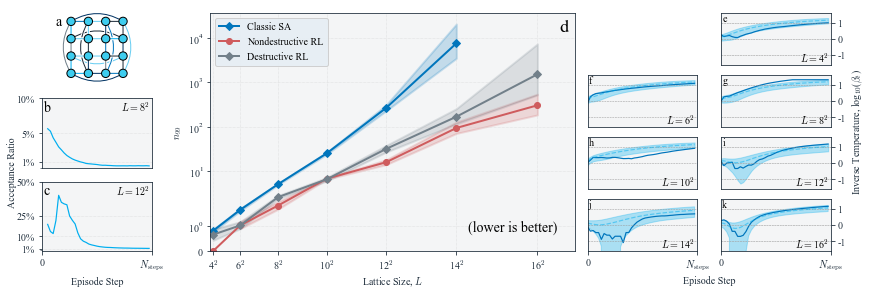

In [173]:
normal = {
    "base":"/home/kmills/COOL/experiments/01_2DTRJ/runs/",
    4:"amusing-reference",
    6:"doubtful-series",
    8:"shivering-apple",
    10:"muddled-hat",
    12:"excellent-taste",
    14:"colorful-dog",
    16:"amazing-motor",
}

no_rnn = {
    "base":"/home/kmills/COOL/experiments/01_2DTRJ/no_rnn/",
    4: "outgoing-suck",
    6: "outgoing-suck",
    8: "ahead-cost",
    10: "nosy-hole",
    12: "thundering-story",
    14: "melted-print",
    16: "grandiose-convert"
}

Ls = [4,6,8,10,12,14,16]


import matplotlib.pyplot as plt


fig = plt.figure(constrained_layout=True, figsize=(12, 4))
gs = fig.add_gridspec(12,6)
axA = fig.add_subplot(gs[0:4, 0])
axB = fig.add_subplot(gs[4:8, 0])
axC = fig.add_subplot(gs[8:12, 0])
axD = fig.add_subplot(gs[:, 1:4])


axBC = fig.add_subplot(gs[5:12, 0])

axA.text(-0.1, 0.97, "a", size=14, transform=axA.transAxes, va='top', ha='left')
axB.text(0.01, 0.97, "b", size=14, transform=axB.transAxes, va='top', ha='left')
axC.text(0.01, 0.97, "c", size=14, transform=axC.transAxes, va='top', ha='left')
axD.text(0.98, 0.97, "d", size=18, transform=axD.transAxes, va='top', ha='right')

ep_axs = [fig.add_subplot(gs[i:i+3,j:j+1]) for i in [0,3,6,9] for j in [4,5]]

labels = "abcdefghijklmnopqrstuvwxyz"

for i,L in enumerate(Ls):
    ax = ep_axs[i+1]
    
    ax.text(0.98, 0, f"$L = ${Ls[i]}$^2$", va='bottom', ha='right', transform=ax.transAxes)
    
    #Find a successful episode.  Easy for small L, but for large L, might be hard.
    episode=0
    success = False
    while not(success):
        episode += 1
        file = os.path.join(normal["base"], "results", normal[L],'dataframes',f"episode_{str(episode).zfill(6)}.h5")
        
        if episode > 999: 
            break
        with h5py.File(file, 'r') as F:
            success = F['success'][...]==1
    

    plot_episode(file, ax, no_legend=True, beta=True, xclip=1., color=COLORS[2], hlines=[0.1,1.0,10.0])
   
    plot_average_policy(os.path.join(normal["base"], "results",normal[L],'dataframes'), ax,
                            linekwargs=dict(alpha=0.5,linestyle='--'),
                            fillkwargs=dict(alpha=0.3), beta=True)
    
    ax.text(0.01, 0.99, labels[i+4], va='top', ha='left', transform=ax.transAxes)
    
    if True:
        ax.set_yscale("log")
        ax.set_yticks([10**(-1), 10**0, 10**1])
        ax.set_yticklabels(['-1', '0', '1'])
        ax.set_ylim([0.25*10**(-1), 4*10**1])
    else:
        ax.set_ylim([0,1])
        
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    if i!=5 and i!=6:
        ax.set_xticks([])
        
    if i%2!=0:
        ax.set_yticks([])
    else:
        ax.yaxis.set_ticks_position("right")


skips = [1, 1]
tickss = [[0.01,0.05,0.1], [0.01,0.1,0.25,0.5]]
ticklabelss = [["1%","5%","10%"], ["1%","10%","25%","50%"]]

for ax, L, skip, ticks, ticklabels in zip([axB, axC], [8, 12], skips, tickss, ticklabelss):
    
    ep = 1
    count = 0
    while True:
        while not(check_success(os.path.join(normal["base"], "results",normal[L],'dataframes',f"episode_{str(ep).zfill(6)}.h5"))):
            ep+=1
        count += 1
        print(count,skip)
        if count==skip:
            file=os.path.join(normal["base"], "results",normal[L],'dataframes', f"episode_{str(ep).zfill(6)}.h5")    
            plot_acceptance(file, ax, no_legend=True)
            ep+=1
            break
            

    ax.text(0.98, 0.97, f"$L = {L}^2$", va='top', ha='right', transform=ax.transAxes)
    ax.set_ylabel("")
    ###ax.set_ylim([0.01, 0.3])
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)

axB.set_xlabel("")
axB.set_xticks([])

axBC.set_ylabel("Acceptance Ratio", labelpad=25)
axBC.set_xticks([])
axBC.set_yticks([])
for spine in ['bottom','top','right','left']:
    axBC.spines[spine].set_color("#ffffff00")
axBC.set_facecolor("#ffffff00")
        



make_sg_graph(axA)

classic_ps = plot_n99_vs_L(axD,
              label="Classic SA",
              hamiltonian_success_files=None,
              color=COLORS[2], linewidth=2.0,
              markers='D',
              override_ks=[9962, 9358, 6010, 1685, 172, 6, 0 ],
              override_ns=[10000,10000,10000,10000,10000,10000,10000],
              Ls= [4,6,8,10,12,14,16]
)


plot_n99_vs_L(axD, Ls=Ls,
              hamiltonian_success_files={ L : os.path.join(normal["base"], "results", normal[L],  "HamiltonianSuccess.dat")\
                                                for L in Ls },
              label="Nondestructive RL",
              color=REDCOLOR, linewidth=2.0)

#Ls = [6,8,10,12,14,16]
#plot_n99_vs_L(axD, Ls=Ls,
#              hamiltonian_success_files={ L : os.path.join(no_rnn["base"], "results", no_rnn[L],  "HamiltonianSuccess.dat")\
#                                                for L in Ls },
#              label="RL (no RNN)",
#              color=COLORS[4], linewidth=2.0)

destructive_ps = plot_n99_vs_L(axD,
              label="Destructive RL",
              hamiltonian_success_files=None,
              color=COLORS[3], linewidth=2.0,
              markers='D', 
              override_ks=[999,988,835,510,136,27,3],
              override_ns=[1000 for _ in range(7)],
              Ls= [4,6,8,10,12,14,16]
)



axD.legend(loc='upper left')
axD.set_yscale("symlog")
axD.set_xscale("linear")
axD.set_xticks([i**2 for i in Ls])
axD.set_ylim(bottom=0)
axD.set_xticklabels([f"{i}$^2$" for i in Ls])
axD.set_xlim([4**2-2, 16**2 + 28])
axD.text(0.95, 0.07, "(lower is better)", va='bottom', ha='right', size=14, transform=axD.transAxes)
    
#Right phantom axis for log(Beta-t)
phantomAxR = fig.add_subplot(gs[:,-2:])
make_axis_invisible(phantomAxR)
phantomAxR.yaxis.set_label_position("right")
phantomAxR.set_ylabel(r"Inverse Temperature, log$_{10}$($\beta_t$)", labelpad=20)
phantomAxR.set_xlabel("Episode Step", labelpad=25)

make_axis_invisible(ep_axs[0])


write=True

if write:

    fig.savefig("SG_results.pdf")
    fig.savefig("SG_results.png")

    git_save("SG_results.pdf")
    git_save("SG_results.png")
    

fig.show()

Paper text:


We divide the instances in the $10\times 10$ validation set into two 
subsets, which we label ``easy'' and ``difficult'', based on the success 
of the classic SA schedule. This results in 14 difficult instances in which classic 
SA succeeds in only 3\% of anneals, and 86 easy instances in which classic SA 
succeeds in more than 3\% of anneals.

We compare three temperature scheduling methods on 100 instantiations of each instance in both of these subsets: 
i) classic SA, 
ii) the RL agent, and 
iii) an RL agent (not yet discussed) that does not include a recurrent LSTM module.  
As seen in \figref[a]{fig:easy_diff}, 
classic SA solves the easy instances in 19\% 
of anneals, whereas the reinforcement learning agent manages to solve the same instances with a 
53\% probability.
With the difficult instances, the difference is more extreme; classic SA manages only 
1\% success, whereas 
RL performs substantially better with 29\% 
success.




/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:294: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


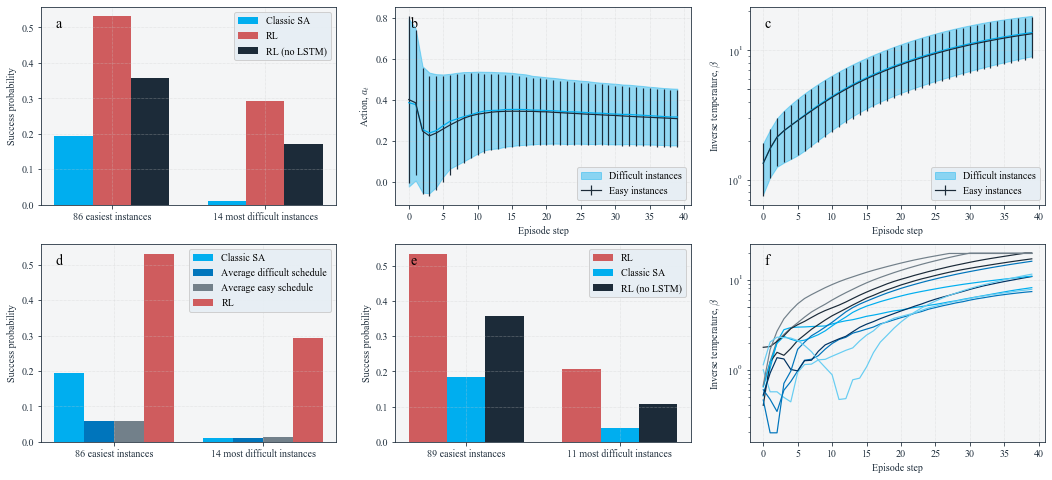

In [185]:
def dict_sum_value_if_in_ref(d, ref):
    s=0
    c=0
    for k in d.keys():
        if k in ref:
            s+=d[k]
            c+=1
    return s,c 

def compute_success(success, total, repeats, n99=False):
    if n99:
        return np.log(1 - 0.99) /  np.log(1-success / (total*repeats))
    else:
        return 100.*success / (total*repeats)
    
    
def plot_several_schedules(datafile, ax, prepend_path="", Ns=[0,]):

    dfdir = os.path.join(prepend_path, datafile, "dataframes")
    
    files = os.listdir(dfdir)
    
    for N in Ns:
        with h5py.File(os.path.join(dfdir,files[N]), 'r') as F:
            if F['success'][...]:
                ax.plot(np.arange(len(F['Tdat'][...])), 1/F['Tdat'][...])

        
        
    ax.set_ylabel(r"Inverse temperature, $\beta$")
    ax.set_xlabel(r"Episode step")

    ax.set_yscale("log")
    ax.set_yticks([1, 5, 10])

        
        
        
        

def plot_easyhard_hamiltonian_success(ref_datafile, compare_datafiles, ref_trials_per_hamiltonian,
                                      comp_trials_per_hamiltonian, axs, bar_colors=None,
                                      prepend_path="", postpend_file="HamiltonianSuccessperHam.dat",
                                     easy_threshold=3, instance_class="ERROR", labels=None, bars_only=False,
                                      
                                     write_schedules=False):
    
    #Use the reference dataset to find the "easy" and "difficult" Hamiltonians
    ff = os.path.join(prepend_path, ref_datafile, postpend_file)
    with open(ff, 'r') as F:
        easy = {}
        diff = {}
        for line in F.readlines():
            ham, numsuc = line.split(',')
            if int(numsuc) <= easy_threshold:
                diff[ham] = int(numsuc)
            else:
                easy[ham] = int(numsuc)
                
    
    comps=[]
    for compare_datafile in compare_datafiles:
        ff = os.path.join(prepend_path, compare_datafile, postpend_file)
        with open(ff, 'r') as F:
            comp = {}
            for line in F.readlines():
                ham, numsuc = line.split(',')
                comp[ham] = int(numsuc)
        comps.append(comp)
            
    
    easy_ref = dict_sum_value_if_in_ref(easy, easy)
    diff_ref = dict_sum_value_if_in_ref(diff, diff)
    
    easy_comps = [dict_sum_value_if_in_ref(comp, easy) for comp in comps]
    diff_comps = [dict_sum_value_if_in_ref(comp, diff) for comp in comps]
    
    
    
    if bars_only:
        if type(axs) != type([0,]):
            axs=[axs]
    else:
        assert len(axs)==3, "You must pass three axes as a list if bars_only != True"
        
    w=0.5 #bar width
    ax = axs[0]
    nseries=1+len(compare_datafiles)
    ax.bar(x=[0,0.5*(nseries+1)], height=[compute_success(*easy_ref, ref_trials_per_hamiltonian)/100., compute_success(*diff_ref, ref_trials_per_hamiltonian)/100.], width=w, label=labels[0], color=bar_colors[0])
    for i in range(len(compare_datafiles)):
        ax.bar(x=[0+w*(i+1),0.5*(nseries+1)+w*(i+1)], height=[compute_success(*easy_comps[i], comp_trials_per_hamiltonian[i])/100.,
                                                              compute_success(*diff_comps[i], comp_trials_per_hamiltonian[i])/100.],
               width=w,
               label=labels[i+1],
               color=bar_colors[i+1]
              )
        
    ax.set_xticks([-w/2 + (w*nseries)/2,
                   -w/2+(w*nseries)/2+w*(nseries+1)])
        
    ax.set_xticklabels([f"{easy_ref[1]} easiest instances", f"{diff_ref[1]} most difficult instances"])
    ax.set_ylabel("Success probability")
    ax.legend()
   
    if not bars_only:
        for compare_datafile in [compare_datafiles[0],]:

            easy_schedules = []
            diff_schedules = []
            easy_actions = []
            diff_actions = []

            dfdir = os.path.join(prepend_path, compare_datafile, "dataframes")
            for df in os.listdir(dfdir):
                with h5py.File(os.path.join(dfdir,df), 'r') as F:

                    if F["hamiltonian"][0].decode('utf-8') in easy:
                        #if F['success'][...]:
                            easy_schedules.append(1/F['Tdat'][...])
                            easy_actions.append(F['Adat'][...])
                    else:
                        #if F['success'][...]:
                            diff_schedules.append(1/F['Tdat'][...])
                            diff_actions.append(F['Adat'][...])


            easy_schedules = np.array(easy_schedules)
            #easy_schedules = easy_schedules / easy_schedules[:,0].reshape((-1,1))
            mean_easy_schedule = np.mean(easy_schedules, axis=0)
            std_easy_schedule = np.std(easy_schedules, axis=0)



            easy_actions = np.array(easy_actions)
            mean_easy_action = np.mean(easy_actions, axis=0)
            std_easy_action = np.std(easy_actions, axis=0)

            diff_schedules = np.array(diff_schedules)
            #diff_schedules = diff_schedules / diff_schedules[:,0].reshape((-1,1))
            mean_diff_schedule = np.mean(diff_schedules, axis=0)    
            std_diff_schedule = np.std(diff_schedules, axis=0)




            diff_actions = np.array(diff_actions)
            mean_diff_action = np.mean(diff_actions, axis=0)
            std_diff_action = np.std(diff_actions, axis=0)

            if write_schedules:
                np.save(f"mean_easy_dbeta_{instance_class}",mean_easy_action)
                np.save(f"mean_diff_dbeta_{instance_class}",mean_diff_action)


            xs = np.arange(len(mean_easy_schedule))
        
        
        
            axs[1].errorbar(xs, mean_easy_action, std_easy_action, color=COLORS[1], label="Easy instances")
            axs[1].fill_between(xs, mean_diff_action + std_diff_action,
                                    mean_diff_action - std_diff_action,
                                    alpha=0.4, color=COLORS[0], label="Difficult instances")                    
            axs[1].plot(xs, mean_diff_action, color=COLORS[0])

            axs[1].legend(loc='lower right')
            axs[1].set_ylabel(r"Action, $a_t$")
            axs[1].set_xlabel(r"Episode step")


            axs[2].errorbar(xs, mean_easy_schedule, std_easy_schedule, label="Easy instances", color=COLORS[1])
            axs[2].fill_between(xs, mean_diff_schedule+std_diff_schedule, mean_diff_schedule-std_diff_schedule,
                                alpha=0.4, color=COLORS[0], label="Difficult instances")
            axs[2].plot(xs, mean_diff_schedule, color=COLORS[0])





            axs[2].legend(loc='lower right')
            axs[2].set_ylabel(r"Inverse temperature, $\beta$")
            axs[2].set_xlabel(r"Episode step")

            axs[2].set_yscale("log")
            axs[2].set_yticks([1, 5, 10])
       

    return easy_ref, diff_ref, easy_comps, diff_comps, instance_class,\
           100*easy_threshold/ref_trials_per_hamiltonian, ref_trials_per_hamiltonian, comp_trials_per_hamiltonian
    
     
fig, axs = plt.subplots(2,3,figsize=(18,8))
        
output = plot_easyhard_hamiltonian_success(ref_datafile=f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/linear_baseline_L10_dbeta_0.002000",
                                  compare_datafiles=[f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/{normal[10]}",
                                                     f"/home/kmills/COOL/experiments/01_2DTRJ/no_rnn/results/{no_rnn[10]}"],
                                           
                                  labels=["Classic SA", "RL", "RL (no LSTM)"],
                                  bar_colors=[COLORS[0], REDCOLOR, COLORS[1]],
                                  axs = axs[0,:],
                                  ref_trials_per_hamiltonian=100,
                                  comp_trials_per_hamiltonian=[100,100],
                                  easy_threshold=3,
                                  instance_class="10x10")


classic_easy, classic_diff,\
(rl_easy, nornn_easy),\
(rl_diff, nornn_diff),\
instance_class, easy_threshold,\
ref_trials_per_hamiltonian, comp_trials_per_hamiltonian = output

pformat = ".0f"

statement = f"""
We divide the instances in the $10\\times 10$ validation set into two 
subsets, which we label ``easy'' and ``difficult'', based on the success 
of the classic SA schedule. This results in {classic_diff[1]} difficult instances in which classic 
SA succeeds in only {easy_threshold:{pformat}}\\% of anneals, and {classic_easy[1]} easy instances in which classic SA 
succeeds in more than {easy_threshold:{pformat}}\\% of anneals.

We compare three temperature scheduling methods on 100 instantiations of each instance in both of these subsets: 
i) classic SA, 
ii) the RL agent, and 
iii) an RL agent (not yet discussed) that does not include a recurrent LSTM module.  
As seen in \\figref[a]{{fig:easy_diff}}, 
classic SA solves the easy instances in {compute_success(*classic_easy, ref_trials_per_hamiltonian):{pformat}}\\% 
of anneals, whereas the reinforcement learning agent manages to solve the same instances with a 
{compute_success(*rl_easy, comp_trials_per_hamiltonian[0]):{pformat}}\\% probability.
With the difficult instances, the difference is more extreme; classic SA manages only 
{compute_success(*classic_diff, ref_trials_per_hamiltonian):{pformat}}\\% success, whereas 
RL performs substantially better with {compute_success(*rl_diff, comp_trials_per_hamiltonian[0]):{pformat}}\\% 
success.

"""


print("Paper text:")
print()
print(statement)

output = plot_easyhard_hamiltonian_success(ref_datafile=f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/{normal[10]}",
                                  compare_datafiles=[f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/linear_baseline_L10_dbeta_0.002000",
                                                  #f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/{normal[10]}",
                                                     f"/home/kmills/COOL/experiments/01_2DTRJ/no_rnn/results/{no_rnn[10]}"],
                                  labels=["RL", "Classic SA", "RL (no LSTM)"],
                                  bar_colors=[REDCOLOR, COLORS[0], COLORS[1]],
                                  ref_trials_per_hamiltonian=100,
                                  comp_trials_per_hamiltonian=[100,100],
                                  easy_threshold=30,
                                  axs=axs[1,1],
                                  instance_class="10x10", write_schedules=False, bars_only=True)



output = plot_easyhard_hamiltonian_success(
      ref_datafile=f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/linear_baseline_L10_dbeta_0.002000",
      compare_datafiles=[f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/linear_baseline_L10_scheduled_tender-advance",
                         f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/linear_baseline_L10_scheduled_zesty-quality",
                         f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/{normal[10]}"],
      labels=["Classic SA",
              "Average difficult schedule", 
              "Average easy schedule", 
              "RL"],
      bar_colors=[COLORS[0], COLORS[2], COLORS[3], REDCOLOR],
      ref_trials_per_hamiltonian=100,
      comp_trials_per_hamiltonian=[100,100,100],
      easy_threshold=3,
      axs=axs[1,0],
      instance_class="10x10", write_schedules=False, bars_only=True
)




plot_several_schedules(datafile=f"/home/kmills/COOL/experiments/01_2DTRJ/runs/results/{normal[10]}",
                       ax=axs[1,2],
                       Ns=np.arange(20))

for ax, l in zip(axs.flatten(), ["a","b","c","d","e","f"]):
    ax.text(0.05, 0.95, l, size=14, ha='left', va='top', transform=ax.transAxes)
    
#    
    

write=True   

if write:
    fig.savefig("easy_diff_split.pdf", bbox_inches='tight')
    fig.savefig("easy_diff_split.png")

    git_save("easy_diff_split.pdf")
    git_save("easy_diff_split.png")

fig.show()

We separate the 10\times10 spin glass instances in the validation set into two subsets (easy and difficult), depending on the success of classic SA in finding their ground states.  In (a) we plot the performance of three different temperature scheduling approaches on these subsets.  RL exhibits superior performance over classic SA in both subsets, however it demonstrates clear superiority in the case of the difficult instances.  RL without an LSTM module still performs better than classic SA; it can still dynamically modify the schedule and is not constrained to a constant temperature change at each step, so is more akin to a traditional heuristic temperature scheduling approach.  In (b) and (c) we plot the average RL actions and schedule, respectively, for both the difficult and easy instance subsets. The standard deviation of the policies are plotted with error bars (easy instances) and shaded regions (difficult instances).  The average difficult policy is very similar to the average easy policy, both having a large standard deviation, suggesting a high degree of specificicty of the policy to the given episode.  We can see this in (f), where we plot several successful schedules; each schedule is quite different from the others, but each results in a successful episode.  In (d), we show the performance when we apply the average actions presented in (b) as a static policy.  The average policies perform even more poorly than classic SA. This is further evidence that the RL agent's ability to observe the system is crucial in its high performance. Note: one might object to the method used to split the instances into the difficult and easy subsets; we have explicitly chosen to split the subsets at a boundary that makes classic SA perform poorly on the difficult instances. In (e), we define a "difficult" ("easy") instance as on that the RL agent performs poorly (well) on, and the story remains unchanged.

error with file ./plotdata/WSC_RL_results.txt


UnboundLocalError: local variable 'beta_ends' referenced before assignment

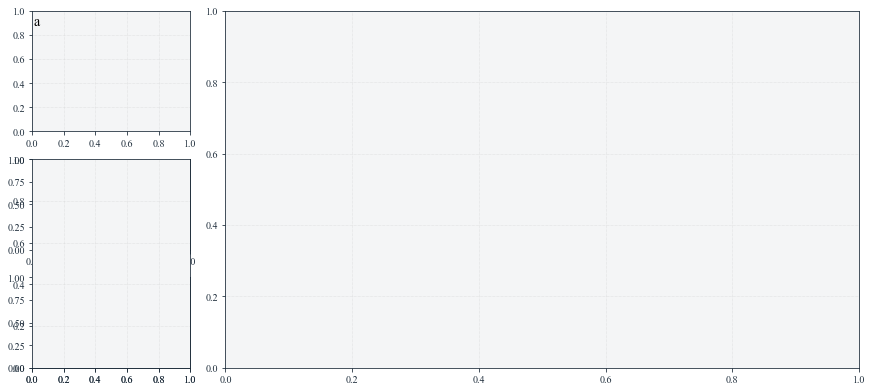

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


SCALE = 1.33333

fig = plt.figure(constrained_layout=True, figsize=(9*SCALE,4*SCALE))
gs = fig.add_gridspec(11,5)
axA = fig.add_subplot(gs[0:4, 0])
axB = fig.add_subplot(gs[5:8, 0])
axC = fig.add_subplot(gs[8:11, 0])
axBC = fig.add_subplot(gs[5:11, 0]) #"Fake" subplot for joint y labelling
axD = fig.add_subplot(gs[:, 1:])



#axA.set_axis_off()
axA.text(0.01, 0.97, "a", size=14, transform=axA.transAxes, va='top', ha='left')
axB.text(0.01, 0.97, "e", size=14, transform=axB.transAxes, va='top', ha='left')
axC.text(0.01, 0.97, "f", size=14, transform=axC.transAxes, va='top', ha='left')

insetR, insetL = plot_wsc_main_plot(axD, inset_offset=[0.115,0.05], labels=['b','c','d'])

for ax, beta_init in zip([axB, axC], [0.5, 1.5]):



    for ep in range(92,93):
        print(plot_acceptance(f'plotdata/WSC-{beta_init}/dataframes/episode_{str(ep).zfill(6)}.h5', ax, no_legend=True))
    

        
    ax.text(1.0,0.0,r"$\beta_i = " + f"{beta_init:.2f}$", va='bottom', ha='right', transform=ax.transAxes)
    ax.set_ylabel("")

    ax.set_ylabel("")
    ax.set_ylim([0,0.10])
    ax.set_yticks([0, 0.02, 0.10])
    ax.set_yticklabels(["0%", "2%","10%"])   


#Phantom axis for plotting the words "Acceptance Ratio" across
make_axis_invisible(axBC)
axBC.set_ylabel("Acceptance Ratio", labelpad=25)

axB.set_xticklabels([])
axB.set_xlabel("")
    
make_wsc_graph(axA)

#phantomAx for (hot) and (cold) labels
phantomAx = fig.add_axes([0.0,0.0,1.0,1.0])
phantomAx.text(0.29,0.03,'(hot)', ha='left', size=14, color=REDCOLOR)
phantomAx.text(0.99,0.03,'(cold)',ha='right', size=14, color=COLORS[2])
phantomAx.set_axis_off()


for ax in [insetR, insetL]:
    ax.set_yticks([10**i for i in [-0.5,0,0.5]])
    ax.set_yticklabels(["-.5","0",".5"])

    
    
write=True   

if write:
    fig.savefig("WSC_results.pdf")
    fig.savefig("WSC_results.png")

    git_save("WSC_results.pdf")
    git_save("WSC_results.png")
    
fig.show()

### Read the data from the "value_function_dump.h5" file
This takes a while, as the energy must be evaluated for each rep of each state in the file, and there are typically around one million states in the file (so around 64 million Hamiltonian evaluations)

In [187]:
from tqdm import tqdm_notebook as tqdm
def get_phase_space_histogram_data(file, zvalue, N=500000):
    with h5py.File(file, 'r') as F:
        
        nobs, nreps, nspins, _ = F['obs'].shape
        for k in F.keys():
            print(k, F[k].shape)
        
        print(f"We need to do {min(nobs,N)*nreps} energy evaluations. With each evaluation taking roughly 2.5 microseconds, this process should take roughly {min(nobs, N)*nreps*2.5 / 1e6 / 60:.2f} minutes ({min(nobs, N)*nreps*2.5 / 1e6} s)")
               
        L = int(np.sqrt(nspins))
        
        Es = np.zeros((min(nobs,N)*nreps))
        Ms = np.zeros((min(nobs,N)*nreps))

        if min(nobs,N)*nreps > 1e6:
            #we need to do the calculations in chunks
            chunksize = 5000
            num_chunks = min(nobs, N) // chunksize
            
            for start in tqdm(range(num_chunks)):
                chunk = F['obs'][start*chunksize:(start+1)*chunksize].reshape((-1, nspins))
                Ms[start*chunksize*nreps:(start+1)*chunksize*nreps] = np.mean(chunk, axis=1)
                Es[start*chunksize*nreps:(start+1)*chunksize*nreps] = Hamiltonian_v(chunk)
                
        else:
            Es = Hamiltonian_v(dat)
        
  
        Es = Es.flatten() / nspins
        Ms = Ms.flatten()    
    
        vals = F['values'][0:N]
        actions = F['actions'][0:N]
        
        vals = np.repeat(np.expand_dims(vals, -1), nreps, 1)
        actions = np.repeat(np.expand_dims(actions, -1), nreps, 1)
        
        alldata = np.stack((Es.flatten(), Ms.flatten(), vals.flatten(), actions.flatten()), axis=1)
                
    return alldata

L=16
alldata = get_phase_space_histogram_data(f"/mount/shockwave/kmills/backups/chromia/1qbit/Boltzmann/SAv1/experiments/01_2DTRJ/16x16/results/ISING/value_function_dump.h5", zvalue='value')

actions (5000000, 1)
obs (5000000, 64, 256, 1)
values (5000000,)
We need to do 32000000 energy evaluations. With each evaluation taking roughly 2.5 microseconds, this process should take roughly 1.33 minutes (80.0 s)


In [188]:
#Cache the data calculated above because it takes over an hour to calculate ~1000000 Ising configurations
np.save("alldata_cache", alldata)

In [189]:
alldata = np.load("alldata_cache.npy")

In [190]:
print(alldata.shape)

(32000000, 4)


In [191]:
L=16

def get_possible_energies(L):
    Es = np.linspace(-2*L**2, 2*L**2, num=L**2+1)
    Es = np.delete(Es, 1)
    Es = np.delete(Es, -2)
    return Es

def get_possible_magnetizations(L):
    return np.linspace(-L**2, L**2, num=L**2 + 1) / L**2


#nbins=(128,128)
#erange=[-2,2] 
#mrange=[-1,1]
Ms = get_possible_magnetizations(L)
dM = Ms[1]-Ms[0]
mag_bins = np.append(np.array(Ms[0])-dM, Ms)
mag_bins += 0.5*dM


Es = get_possible_energies(L) / L**2
dE = Es[4]-Es[3]
ene_bins = np.append(np.array(Es[0])-dE, Es)
ene_bins += 0.5*dE

nbins =[mag_bins, ene_bins]

mrange = [mag_bins.min(), mag_bins.max()]
erange = [ene_bins.min(), ene_bins.max()]

h_counts, xedges, yedges = np.histogram2d(alldata[:,1], alldata[:,0], range=(mrange,erange), bins=nbins)

val_h_weighted, xedges, yedges = np.histogram2d(alldata[:,1], alldata[:,0], weights=alldata[:,2], range=(mrange,erange), bins=nbins)
act_h_weighted, xedges, yedges = np.histogram2d(alldata[:,1], alldata[:,0], weights=alldata[:,3], range=(mrange,erange), bins=nbins)

In [192]:
loggME_normed = np.load("loggME_normed.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'loggME_normed.npy'

/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in true_divide
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in true_divide
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in true_divide
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: RuntimeWarning: divide by zero encountered in true_divide
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in true_divide


<KeysViewHDF5 ['Adat', 'Edat', 'Mdat', 'Tdat', 'arat', 'ground_state_energy', 'states', 'success', 'terminal_energies']>
<KeysViewHDF5 ['Adat', 'Edat', 'Mdat', 'Tdat', 'arat', 'ground_state_energy', 'states', 'success', 'terminal_energies']>
<KeysViewHDF5 ['Adat', 'Edat', 'Mdat', 'Tdat', 'arat', 'ground_state_energy', 'states', 'success', 'terminal_energies']>


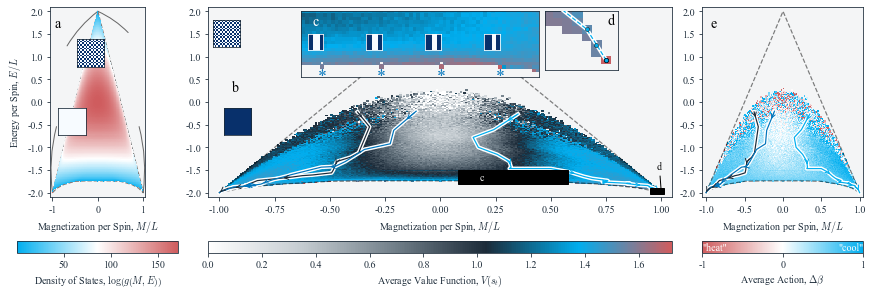

In [231]:
%matplotlib inline

def add_zoom_child(parent_ax, zoom_region, inset_xywh, rectangle_color):
    inset_pos = zoom_region
    
    axBB = add_sub_axes(parent_ax, inset_xywh)
    axBB.set_xlim(inset_pos[0])
    axBB.set_ylim(inset_pos[1])
    axBB.set_xticks([])
    axBB.set_yticks([])
    from matplotlib.patches import Rectangle
    parent_ax.add_patch(Rectangle(xy=(inset_pos[0][0], inset_pos[1][0]),
                            width=inset_pos[0][1] - inset_pos[0][0],
                            height=inset_pos[1][1] - inset_pos[1][0],
                            edgecolor='black',
                            color='black',
                            alpha=1.0, zorder=5000))
    return axBB
    
    

def wrap(AA, BB, CC, cmaps=['RdBu_r', 'rainbow', 'RdBu'], paramm=None):
    scaling=1
    fig = plt.figure(constrained_layout=True, figsize=(12*scaling,4*scaling))
    gs = fig.add_gridspec(10,18)

    # gs[y, x]
    axA = fig.add_subplot(gs[:-1, 0:5])
    axB = fig.add_subplot(gs[:-1, 5:13])
    axC = fig.add_subplot(gs[:-1, 13:18])
    
    cbaxA = fig.add_subplot(gs[-1, 0:5])
    cbaxB = fig.add_subplot(gs[-1, 5:13])
    cbaxC = fig.add_subplot(gs[-1, 13:18])
    #axD = fig.add_subplot(gs[:-1,18:24])

    X, Y = np.meshgrid(xedges, yedges)
    X_, Y_ = np.meshgrid(xedges[1:], yedges[1:])
    MM, EE = np.meshgrid(get_possible_magnetizations(L), get_possible_energies(L)/L**2)
    
    loggME_normed = np.zeros((len(get_possible_magnetizations(L)), len(get_possible_energies(L))))*np.nan
    loggME_normed[0,0] = 171
    loggME_normed[0,1] = 1
    #loggME_normed = mpimg.imread("landau16.png")
    
    dos_image = axA.pcolormesh(MM, EE, loggME_normed.T, cmap=cmaps[0], rasterized=True, zorder=10)
    
    _ = axA.imshow(mpimg.imread("landau16.png"), aspect=1., zorder=100, extent=[-1,1,-2,2] )
    

    #outlined regions:
    x = [-1.0,-0.9,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,0.9,(1.0 + 1/L**2), (0+0.5/L**2), -1]
    y = [-2,-1.9,-1.82, -1.75, -1.74, -1.74, -1.74, -1.75, -1.82,-1.9, -2,  2, -2]
    for ax in [axA, axB, axC]:
        ax.plot(x,y, linestyle='--', color='k', alpha=0.5)

        
    example_configs = True
    if example_configs:
        #example_configs
        s=0.15
        x_pos_scale=-0.05
        chkA=add_sub_axes(axA, [0.60+x_pos_scale, 0.95,  s, s])
        chkD=add_sub_axes(axA, [-0.15+x_pos_scale, 0.85,  s, s])
        chkB=add_sub_axes(axA, [-0.25+x_pos_scale, 0.5, s, s])
        chkC=add_sub_axes(axA, [0.66+x_pos_scale, 0.5,   s, s])
        chk = np.array([-1,1]*(16**2//2)).reshape((16,16))
        chk[::2,:]*=-1
        chkA.imshow(chk, vmin=-1, vmax=1)
        chkB.imshow(np.zeros((16,16))-1, vmin=-1, vmax=1)
        chkC.imshow(np.zeros((16,16))+1, vmin=-1, vmax=1)
        chkD.imshow(chk*-1)
        #annotations (i.e. connecting lines)
        starts = [(1,-2), (-1, -2), (0,2), (0,2)]
        ends = [(0.9, -0.5), (-0.9, -0.5), (0.7, 1.5), (-0.7, 1.2)  ]
        cs= ["arc3,rad=-0.1", "arc3,rad=0.1", "arc3,rad=0.1", "arc3,rad=-0.1" ]
        for start, end, c in zip(starts, ends, cs):

            axA.annotate("",
                    xy=start, xycoords='data',
                    xytext=end, textcoords='data',
                    arrowprops=dict(arrowstyle="-",
                                    color='#666666',
                                    patchB=None,
                                    shrinkB=0,
                                    connectionstyle=c,
                                    ),
                    )
        for ax in [chkA, chkB, chkC, chkD]:
            ax.set_xticks([])
            ax.set_yticks([])

        
    fast=False
    if fast==False:
        counts = np.copy(h_counts)
        counts[counts < 1] = 0
        val_image = axB.pcolormesh(X, Y, val_h_weighted.T/counts.T, 
                                   vmin=0, 
                                   cmap=cmaps[1], rasterized=True)
        
        #val_image = axB.contourf(X_, Y_, val_h_weighted.T/counts.T, 
        #                           vmin=0, 
        #                           cmap=cmaps[1]) #, rasterized=True)
              
               
        axBB = add_zoom_child(axB, [[0.95, 1.01],[-2.02, -1.90]], inset_xywh=(0.83, 0.84, 0.25, 0.30), rectangle_color='black')
        axBA = add_zoom_child(axB, [[0.08,0.58],[-1.8,-1.5]], inset_xywh=(-0.0,0.80,0.81,0.34),  rectangle_color='black')
        
        for ax in [axBB, axBA]:
            ax.pcolormesh(X, Y, val_h_weighted.T/counts.T, cmap=cmaps[1], rasterized=True)
        
        #cnt_image = axD.pcolormesh(X, Y, np.log10(h_counts.T), cmap='Reds', rasterized=True)
        act = act_h_weighted.T/counts.T
        act[act==np.inf] = np.nan
        act[act==-np.inf] = np.nan

        norm = matplotlib.colors.DivergingNorm(vmin=np.nanmin(act), vcenter=0, vmax=np.nanmax(act))
        norm = matplotlib.colors.DivergingNorm(vmin=-1, vcenter=0, vmax=1)
        #vmin, vmax = (-np.nanmax(np.abs(act)), np.nanmax(np.abs(act)))
        #vmin, vmax = (-2, 2)
        act_image = axC.pcolormesh(X, Y, act, cmap=cmaps[2], rasterized=True, norm=norm)

    usecolors = COLORS

    tAx = add_sub_axes(axC, (0.88,0.92,0.47,0.24))

    for i,t in enumerate([AA,BB,CC]): #1,3]):
        ep = t
        dataframe = f"/mount/shockwave/kmills/backups/chromia/1qbit/Boltzmann/SAv1/experiments/01_2DTRJ/{L}x{L}/results/ISING/dataframes/episode_{str(ep).zfill(6)}.h5"
        with h5py.File(dataframe, 'r') as F:
            print(F.keys())
            trajE = np.apply_along_axis(Hamiltonian, axis=2, arr=F['states'][...])[:,0] / F['states'].shape[-1]
            trajM = np.apply_along_axis(np.mean, axis=2, arr=F['states'][...])[:,0]

            kwargs=dict(markersize=8, markeredgewidth=0.5, markeredgecolor='k')
            axB.plot(trajM, trajE, '-', **kwargs,  color=usecolors[i%len(usecolors)], zorder=1000)
            axC.plot(trajM, trajE, '-', **kwargs, color=usecolors[i%len(usecolors)], zorder=1000)
            axBB.plot(trajM, trajE, '--.', **kwargs, color=usecolors[i%len(usecolors)], zorder=1000)
            
            axB.plot(trajM, trajE, '-', linewidth=4.0, color='white', zorder=100)
            axC.plot(trajM, trajE, '-', linewidth=4.0, color='white', zorder=100)
            axBB.plot(trajM, trajE, '-', linewidth=4.0, color='white', zorder=100)
            
            for ax in [axB, axC]:
                for step in range(0,len(trajM)-1,5):
                    s = [0.5 * (trajM[step+1]+trajM[step]), 0.5*(trajE[step+1]+trajE[step])]
                    ax.annotate("",
                        xy=(s[0], s[1]), xycoords='data',
                        xytext=(trajM[step],trajE[step]),
                        textcoords='data',
                        arrowprops=dict(arrowstyle="->",
                                        color=usecolors[i%len(usecolors)],
                                        connectionstyle="arc3,rad=0.0",
                                        linewidth=1,
                                        #zorder=2000
                                ),
                                zorder=2000
                    )
                    
            
            

            tAx.plot(1./F['Tdat'][...], color=usecolors[i%len(usecolors)])
            tAx.set_ylabel(r"$\beta$", labelpad=0)
            tAx.set_xlabel("Episode Step", labelpad=-8)
            tAx.set_xticks([0, F['Tdat'].shape[0]])
            tAx.set_xlim([0, F['Tdat'].shape[0]])
            tAx.set_xticklabels(["0",r"$N_\mathrm{steps}$"])
            tAx.yaxis.set_label_position("right")
            tAx.yaxis.tick_right()


    for ax in [axA, axB, axC]:
        ax.set_xlabel("Magnetization per Spin, $M/L$")
        ax.set_xlim([-1.05,1.05])
        ax.set_ylim([-2.10,2.10])
    axA.set_ylabel("Energy per Spin, $E/L$")

    #------ COLOR BARS -----

    #cbaxD = fig.add_subplot(gs[-1,18:24])
    fig.colorbar(dos_image, cax=cbaxA, orientation='horizontal', shrink=0.5)
    fig.colorbar(val_image, cax=cbaxB, orientation='horizontal', shrink=0.5)
    fig.colorbar(act_image, cax=cbaxC, orientation='horizontal', shrink=0.5, ticks=[-1, 0, 1])
    #fig.colorbar(cnt_image, cax=cbaxD, orientation='horizontal', shrink=0.5)
    cbaxA.set_xlabel(r"Density of States, $\log\left(g\left(M, E\right)\right)$")
    cbaxB.set_xlabel(r"Average Value Function, $V(s_t)$")
    cbaxC.set_xlabel(r"Average Action, $\Delta\beta$")
    cbaxC.text(1, 0.4, "\"cool\"", color='white', va='center', ha='right', transform=cbaxC.transAxes)
    cbaxC.text(0, 0.4, "\"heat\"", color='white', va='center', ha='left', transform=cbaxC.transAxes)
    #-------------------------

    axA.text(0.05, 0.95, "a", size=14, ha='left', va='top', transform=axA.transAxes)
    axB.text(0.05, 0.61, "b", size=14, ha='left', va='top', transform=axB.transAxes)
    axBA.text(0.05, 0.95, "c", color='white', size=14, ha='left', va='top', transform=axBA.transAxes)
    axBB.text(0.95, 0.95, "d", size=14, ha='right', va='top', transform=axBB.transAxes)
    axC.text(0.05, 0.95, "e", size=14, ha='left', va='top', transform=axC.transAxes)
    tAx.text(0.05, 0.93, "f", size=14, ha='left', va='top', transform=tAx.transAxes)
    
    axB.text(0.18, -1.657, "c", va='center', color="white", zorder=5001)

    axB.annotate("d",
        xy=(1,-2), xycoords='data',
        xytext=(0.98, -1.5), textcoords='data',
        arrowprops=dict(arrowstyle="-",
                        color='k',
                        patchB=None,
                        shrinkB=0,
                        connectionstyle="arc3,rad=0.0",
                        ),
        )

        
    for xi in range(1,5):
        axBA.text(0.125*xi,  -1.76,"*",size=18, color=COLORS[2], va='top', ha='center')
    
#----EXAMPLE BANDED STRUCTURES ON INSET OF MIDDLE FIGURE    
    band_axs = [add_sub_axes(axB, [0.01+i*0.20, 0.94, 0.08, 0.08]) for i in range(4)]
    for bax in band_axs:
        for spine in ['left','right','top','bottom']:
            bax.spines[spine].set_color('white')
        bax.set_xticks([])
        bax.set_yticks([])    
    #plot the example banded structures:    
    A = np.zeros((16,16)) + 1
    A[:,8:12] = -1
    band_axs[-1].imshow(A)
    A[:,7] = -1
    band_axs[-2].imshow(A)
    A[:,6] = -1
    band_axs[-3].imshow(A)
    A[:,5] = -1
    band_axs[-4].imshow(A)
    
    tAx.remove()
    
    write=False
    if write:
        fig.savefig("value_plot.pdf")
        fig.savefig("value_plot.png")

        git_save("value_plot.pdf")
        git_save("value_plot.png")

    return fig

hex2rgb = lambda h: tuple(int(h.replace('#','')[i:i+2], 16) for i in (0, 2, 4))

CS = ["ffffff", "c5ccd1", COLORS[3], COLORS[1],COLORS[0], REDCOLOR]
my_rainbow = make_cmap([hex2rgb(h) for h in CS], bit=True)

CS = [COLORS[0], 'ffffff', REDCOLOR]
my_RdBu = make_cmap([hex2rgb(h) for h in CS], bit=True)
my_RdBu_r = make_cmap([hex2rgb(h) for h in reversed(CS)], bit=True)

fig = wrap(32,22,23, cmaps=[my_RdBu, my_rainbow, my_RdBu_r], paramm=-0.05)

plt.show()




In [225]:
print (mpimg.imread("landau16.png").shape)

(255, 257, 4)


/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


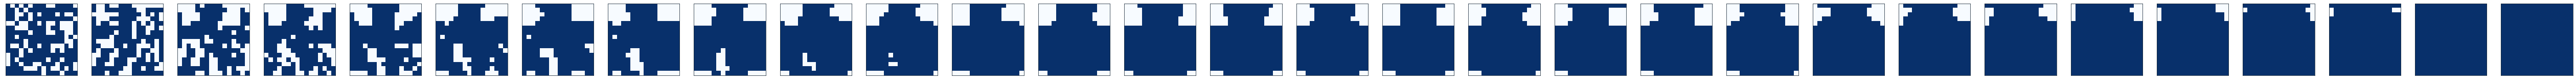

In [83]:
L=16
ep=1

rep=0
dataframe = f"/home/kmills/1qbit/Boltzmann/SAv1/experiments/01_2DTRJ/{L}x{L}/results/ISING/dataframes/episode_{str(ep).zfill(6)}.h5"

with h5py.File(dataframe, 'r') as F:
    s=3
    fig, ax = plt.subplots(ncols=30, nrows=1, figsize=(30*s,1*s))
    for time in range(30):
        ax[time].imshow(F['states'][time,rep,:].reshape(16,16), vmin=-1, vmax=1)
        ax[time].set_xticks([])
        ax[time].set_yticks([])

        
        
write=False
if write:
    fig.savefig("traj_conf.pdf")
    fig.savefig("traj_example.png")

    git_save("traj_example.pdf")
    git_save("traj_example.png")        

/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


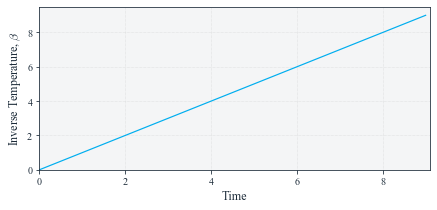

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(14//2,6//2))
ax.plot(np.arange(10), np.arange(10))
ax.set_xlabel("Time")
ax.set_ylabel(r"Inverse Temperature, $\beta$")
ax.set_ylim([0,9.5])
ax.set_xlim([0,9.1])
fig.show()

In [32]:
#rsync(["-av"], "thundercracker:/home/kmills/1qbit/Boltzmann/SAv1/experiments/00_WSC_PPO_redo/sa/results/WSC_SA_results.txt","./plotdata/WSC_SA_results.txt" ) 
#rsync(["-av"], "thundercracker:/home/kmills/1qbit/Boltzmann/SAv1/experiments/00_WSC_PPO_redo/test/results/WSC_RL_results.txt","./plotdata/WSC_RL_results.txt" ) 
#rsync(["-av"], "moonracer:/home/kmills/1qbit_thundercracker/1qbit/Boltzmann/SAv1/experiments/00_WSC_PPO_redo/test/results/","./plotdata/" )

# Diagram of models

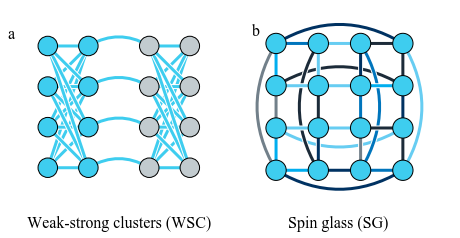

In [44]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
make_wsc_graph(ax[0], linewidth=3)
make_sg_graph(ax[1], linewidth=3)
ax[1].set_xlim([i*1.2 for i in ax[1].get_xlim()])


fig.text(0.32, 0.1, "Weak-strong clusters (WSC)", size=16, va='center', ha='center', )
fig.text(0.7, 0.1, "Spin glass (SG)", size=16, va='center', ha='center',)

ax[0].text(0.0,0.9, "a", size=16, va='bottom', ha='left', transform=ax[0].transAxes)
ax[1].text(0.0,0.9, "b", size=16, va='bottom', ha='left', transform=ax[1].transAxes)



fig.savefig("models.pdf", bbox_inches='tight')
fig.savefig("models.png")

git_save("models.pdf")
git_save("models.png")
    

# Unused plots 

In [ ]:
if False:

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import numpy as np

    %matplotlib inline

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')



    # Make data.
    Z = np.copy(loggME_normed.T) #z=DOS
    Z = np.nan_to_num(Z)

    #blur the DOS a bit to make it not ugly-discontinuous at the boundary
    from scipy.ndimage import gaussian_filter
    Z = gaussian_filter(Z, sigma=2.0)

    counts = np.copy(h_counts)
    #counts[counts < 500] = 0

    raw = val_h_weighted.T/counts.T
    color = np.copy(raw)
    color[counts.T < 5000] = np.nan
    #color = val_h_weighted.T/h_counts.T
    norm = matplotlib.colors.Normalize(np.nanmin(raw), np.nanmax(raw))
    C = cm.Blues(norm(color))


    MM, EE = np.meshgrid(get_possible_magnetizations(L), get_possible_energies(L)/L**2)

    #draw every res bins
    res = 1



    # Plot the surface.
    surf = ax.plot_surface(MM, EE, Z, facecolors=C, cmap='Blues',
                           rstride=res, cstride=res, antialiased=True, shade=True, rasterized=True )

    #surf = ax.plot_wireframe(MM, EE, Z, color='w',
    #                       rstride=5, cstride=5, linewidth=0.1, antialiased=True)


    surf = ax.plot_surface(MM, EE, np.zeros_like(Z)-200, facecolors=C,
                           rstride=res, cstride=res, antialiased=True, cmap='Blues', rasterized=True)

    # Customize the z axis.
    ax.set_zlim(-200, 100)
    #ax.view_init(22,  -56)
    ax.view_init(27, -124)

    ax.set_ylabel("Energy per Spin, E/L")
    ax.set_xlabel("Magnetization per Spin, M/L")
    ax.set_zlabel(r"Density of States, $\log(g(M,E))$")


    #tM, tE = (-0.0, -1.5)
    #tM, tE, example_config = brute_force_gen_e_m_config(tM, tE, L)
    #exax = fig.add_axes((0.3,0.4,0.1,0.1))
    #exax.imshow(np.tile(example_config.reshape(L,L), (1,1)),)
    #exax.set_axis_off()
    #ax.plot([tM], [tE], [-200], zorder=100, marker='o', color=REDCOLOR)



    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    fig.savefig("3d.png")
    git_save("3d.png")